In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv("data-export (1).csv")

In [8]:
df.head()

,# ----------------------------------------,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,Session primary channel group (Default channel...,Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
1,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
2,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
3,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
4,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044


# ""Step1 :- Data Cleaning we remove Unnamed column from Headers ""

In [29]:
# Step 1: Set first row as header
df.columns = df.iloc[0]

# Step 2: Drop the first row and reset the index
df = df.drop(index=0).reset_index(drop=True)

# Step 3: Rename columns with your custom names
df.columns = ["channel group", "Date hour", "user", "Sessions", "Engaged sessions",
              "Average engagement time per session", "Engaged sessions per user",
              "Events per session", "Engagement rate", "Event count"]


In [31]:
df.head()

,channel group,Date hour,user,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024041719,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024041723,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024041718,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024041720,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date hour                            3182 non-null   datetime64[ns]
 2   user                                 3182 non-null   object        
 3   Sessions                             3182 non-null   object        
 4   Engaged sessions                     3182 non-null   object        
 5   Average engagement time per session  3182 non-null   object        
 6   Engaged sessions per user            3182 non-null   object        
 7   Events per session                   3182 non-null   object        
 8   Engagement rate                      3182 non-null   object        
 9   Event count                          3182 non-null   object        
dtypes: datetime6

In [43]:
# date Hurs columns formation object to datetime
df["Date hour"] = pd.to_datetime(df["Date hour"], format="%Y%m%d%H", errors='coerce')
df.head()


,channel group,Date hour,user,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024-04-16 23:00:00,237,300,144,47.526666666666700,0.6075949367088610,4.673333333333330,0.48,1402
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.09737827715360,0.6346153846153850,4.295880149812730,0.4943820224719100,1147
2,Direct,2024-04-17 23:00:00,188,233,115,39.93991416309010,0.6117021276595740,4.587982832618030,0.49356223175965700,1069
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.16015625,0.6684491978609630,4.078125,0.48828125,1044
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552036199100,0.64,4.529411764705880,0.5067873303167420,1001


In [47]:
numeric_cols = df.columns.drop(["channel group","Date hour"])      # channel and date hours ko chode ke sab per numerice value
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  #converting the object value to numerice values
df["hour"] = df["Date hour"].dt.hour  #add new hour columns 

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   channel group                        3182 non-null   object        
 1   Date hour                            3182 non-null   datetime64[ns]
 2   user                                 3182 non-null   int64         
 3   Sessions                             3182 non-null   int64         
 4   Engaged sessions                     3182 non-null   int64         
 5   Average engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user            3182 non-null   float64       
 7   Events per session                   3182 non-null   float64       
 8   Engagement rate                      3182 non-null   float64       
 9   Event count                          3182 non-null   int64         
 10  hour        

In [51]:
df.head()

,channel group,Date hour,user,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [53]:
df.describe()

,Date hour,user,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


# 1.Sesions and user over time

In [57]:
sns.set(style="whitegrid")

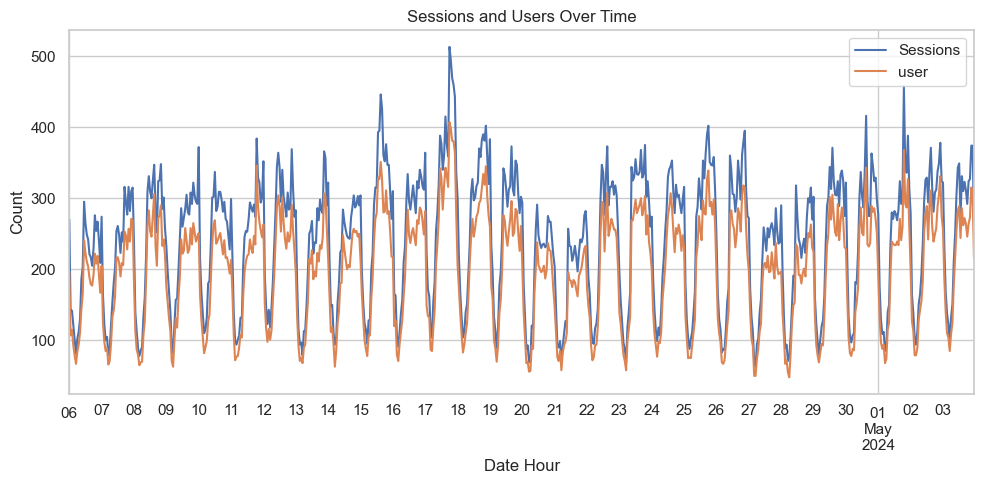

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df.groupby("Date hour")[["Sessions", "user"]].sum().plot(ax=plt.gca())
plt.title("Sessions and Users Over Time")
plt.xlabel("Date Hour")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()


# 2.Which marketing channel brought the highest number of users to the website, and how can we use this insight to improve traffic from other sources?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12416\319837041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="channel group",y="user",estimator=np.sum, palette="viridis")


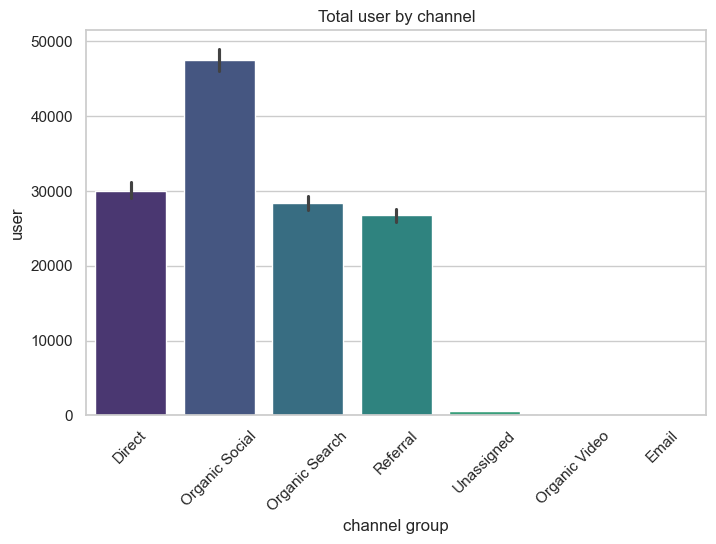

In [70]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x="channel group",y="user",estimator=np.sum, palette="viridis")
plt.title("Total user by channel")
plt.xticks(rotation=45)
plt.show()

# 3. Which channel has the highest average engagement time, and what does that tell us about user behavior and content effectiveness?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12416\2599408845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x = "channel group", y = "Average engagement time per session", estimator=np.mean, palette="magma")


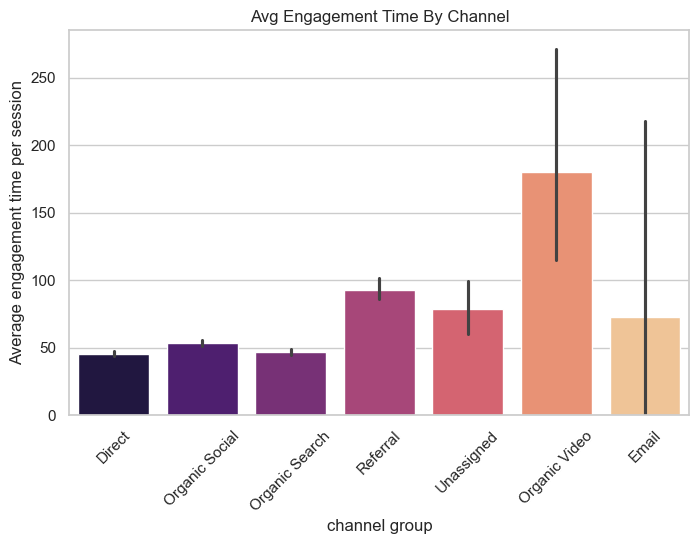

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(data=df, x = "channel group", y = "Average engagement time per session", estimator=np.mean, palette="magma")
plt.title("Avg Engagement Time By Channel")
plt.xticks(rotation=45)
plt.show()

In [85]:
df.head()

,channel group,Date hour,user,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


# 4.How does engagement rate vary across different traffic channels?

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12416\1390864236.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x = "channel group" , y = "Engagement rate", palette="coolwarm")


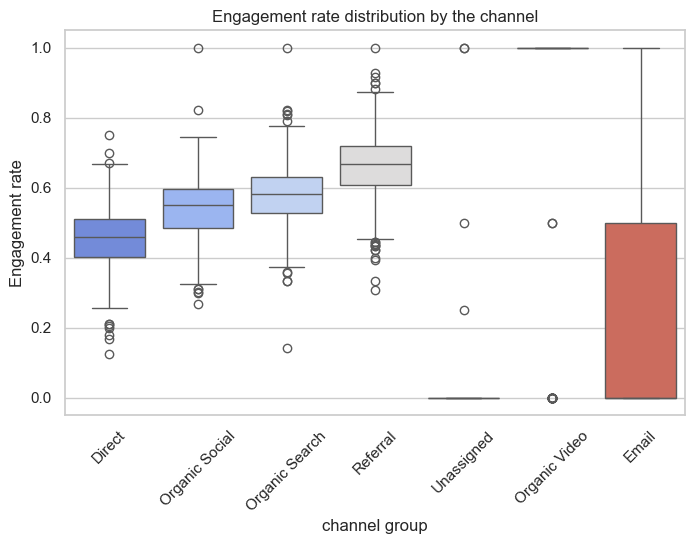

In [92]:
plt.figure(figsize = (8,5))
sns.boxplot(data=df, x = "channel group" , y = "Engagement rate", palette="coolwarm")    # palette for color
plt.title("Engagement rate distribution by the channel")
plt.xticks(rotation=45)
plt.show()

# 5. Which channels are driving more engaged sessions compared to non-engaged ones, and what strategies can improve engagement in underperforming channels?


                Engaged sessions  Non-engaged sessions
channel group                                         
Organic Social             32697                 27930
Referral                   20653                 10337
Organic Search             19425                 13947
Direct                     17243                 19960
Organic Video                109                    32
Unassigned                     4                   555
Email                          1                     2


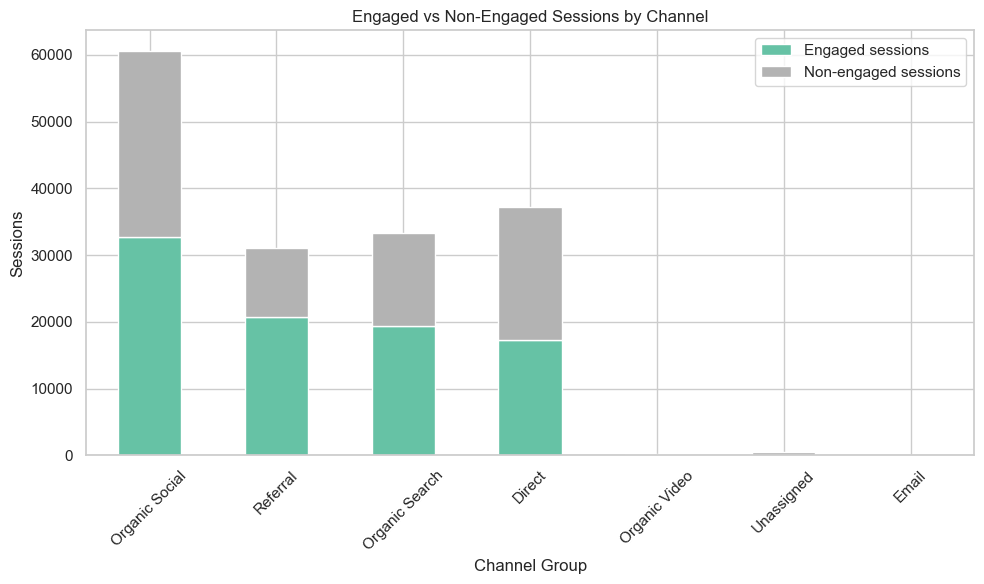

In [101]:
# engaged and Non Engaged we will work

# Convert to numeric if needed
df["Engaged sessions"] = pd.to_numeric(df["Engaged sessions"], errors='coerce')
df["Sessions"] = pd.to_numeric(df["Sessions"], errors='coerce')

# Create new column: Non-Engaged Sessions = Total - Engaged
df["Non-engaged sessions"] = df["Sessions"] - df["Engaged sessions"]

# Group by channel
channel_sessions = df.groupby("channel group")[["Engaged sessions", "Non-engaged sessions"]].sum().sort_values("Engaged sessions", ascending=False)

print(channel_sessions)



import matplotlib.pyplot as plt

channel_sessions.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')
plt.title("Engaged vs Non-Engaged Sessions by Channel")
plt.ylabel("Sessions")
plt.xlabel("Channel Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 6. At what hours of the day does each channel drive the most traffic?

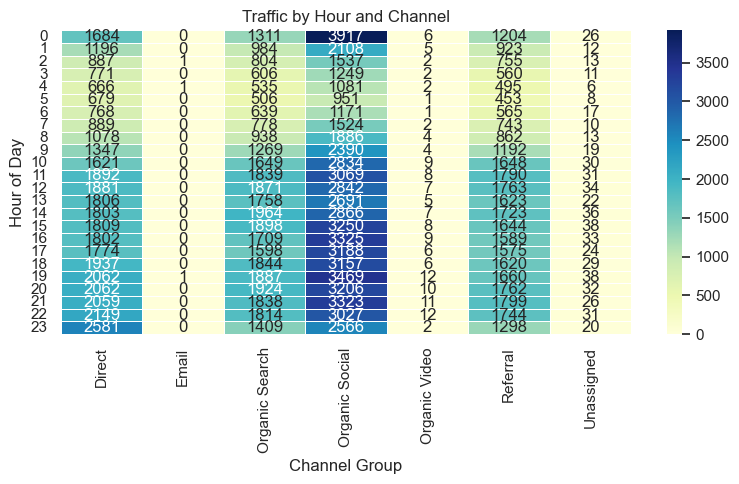

In [106]:

# Make sure 'hour' column exists (extract from datetime if needed)
df["hour"] = pd.to_datetime(df["Date hour"], errors='coerce').dt.hour

# Group and pivot data for heatmap
heatmap_data = df.groupby(["hour", "channel group"])["Sessions"].sum().unstack().fillna(0)

# Plot the heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=0.5, annot=True, fmt='.0f')
plt.title("Traffic by Hour and Channel")
plt.xlabel("Channel Group")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()
